# <h1 align="center">COVID-19: Data Analysis And Insights</h1>                                           
<img src="covidimage.gif" width="500" align="center">

The aim of these project is to analyse Italy COVID-19 multiple datasets as provided by John Hopkins University,to gain insights about the virus by analysing the data and seeking answers to some possible questions we may have.

Dataset source: <a href = 'https://www.kaggle.com/virosky/italy-covid19'>Here</a>

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud, ImageColorGenerator



import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline

### Gaining insights about the details of the individuals with the virus


**First Dataset**

The dataset contains age distribution of Covid-19 cases across all pronvinces in Italy.We will explore the dataset doing some data cleaning and manipulation and provide answers visualition of the following questions.

* Age distribution of all total cases
* Age distribution of total Deaths
* Compare Age distribution of confirmed cases by Gender

In [79]:
#import Datasets
covid_age = pd.read_csv('Data/covid-age.csv',index_col = 'age_classes')
covid_age

,Unnamed: 0,male_cases,male_deaths,female_cases,female_deaths,total_cases,total_deaths,piemonte_cases,lombardia_cases,veneto_cases,...,toscana_cases,umbria_cases,marche_cases,lazio_cases,abruzzo_cases,molise_cases,campania_cases,puglia_cases,sicilia_cases,sardegna_cases
age_classes,,,,,,,,,,,,,,,,,,,,,
0-9,0,381,0,307,0,693,0,35,205,90,...,56,22,20,35,16,1,17,21,12,7
10-19,1,475,0,454,0,931,0,29,170,164,...,66,20,29,48,41,7,30,34,23,8
20-29,2,1919,4,2531,2,4530,6,311,1494,715,...,167,65,127,152,62,6,102,117,59,23
30-39,3,3505,22,3885,7,7466,29,479,2778,879,...,264,96,265,283,124,12,138,195,85,70
40-49,4,6480,81,7130,29,13701,110,1021,5436,1460,...,523,111,472,436,238,22,203,298,147,115
50-59,5,11149,377,9706,100,20975,479,1634,8866,2182,...,825,191,725,654,267,47,303,445,241,126
60-69,6,11761,1144,6254,299,18089,1448,1436,8266,1483,...,701,139,630,507,300,28,268,353,190,93
70-79,7,12281,3146,6868,1041,19238,4196,1551,9651,1303,...,661,96,642,450,204,13,176,271,133,79
80-89,8,8553,3259,7644,1767,16252,5029,1345,7631,1371,...,525,54,659,396,151,16,101,260,79,76


In [83]:
#Drop two first columns
covid_age.drop(covid_age.iloc[:,0:1],axis = 1,inplace = True)

In [84]:
#Age distribution of total cases
cases = covid_age.groupby(['age_classes'])[('total_cases','male_cases','female_cases')].agg(sum).reset_index()

In [85]:
#Age distribution of total Deaths

deaths= covid_age.groupby(['age_classes'])[('total_deaths','male_deaths','female_deaths')].agg(sum).reset_index()

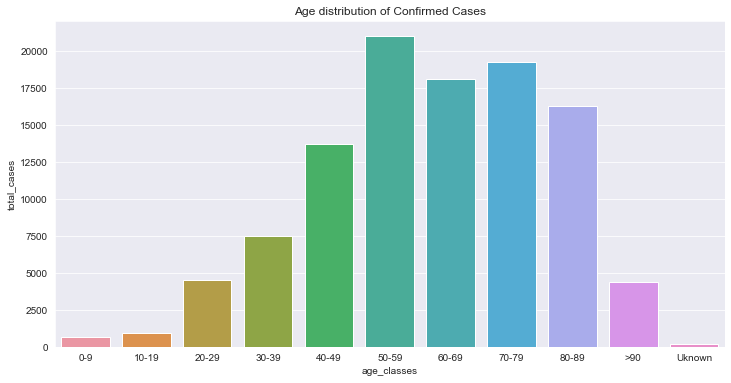

In [182]:
# Plot data
fig, ax = plt.subplots(figsize=(12,6))
plt.title("Age distribution of Confirmed Cases")
sns.barplot(ax = ax,
            data = cases,
            x = 'age_classes',
            y = 'total_cases')
plt.show()

The plot aboves clearly shows that irrespective of gender,most confirmed COVID-19 cases occur among people advanced in age.

<Figure size 432x288 with 0 Axes>

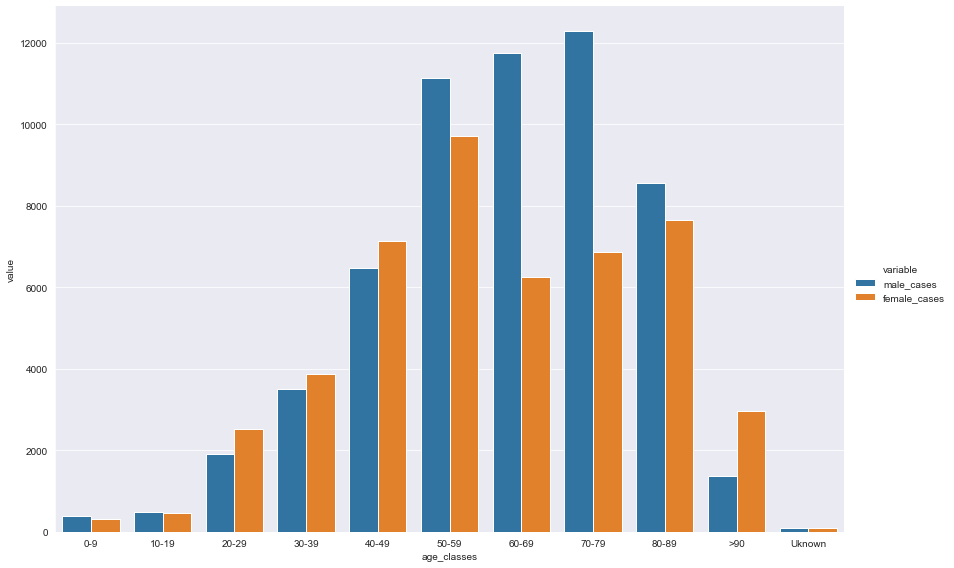

In [181]:
#Manipulate data to obtain a ngender based plot 
df_melt = pd.melt(cases, value_vars = ("male_cases","female_cases"),id_vars = "age_classes")

fig = plt.figure()
sns.factorplot(x = 'age_classes', y='value', hue = 'variable',data=df_melt, kind='bar',height=8, aspect=1.5 )

plt.show()

Based on gender males tend to dominate in the number of confirmed cases.

In [183]:
#Piecharts comparing Confirmed and Death cases

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],
                   x_title='Ratio of confrmed and death cases based on gender')


fig.add_trace(go.Pie(
     values=cases['male_cases'],
     labels=cases['age_classes'],
     domain=dict(x=[0,0.5]),
     name='Male: Confirmed cases'), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=cases['female_cases'],
     labels=cases['age_classes'],
     domain=dict(x=[0.5,1.0]),
     name='Female: Confirmed cases'), 
    row=1, col=2)

fig.show()

**Second Dataset**

Pre-existing chronic patologies observed in patients deceased by COVID19 . Last 4 rows are records of patients deceased and detection on how comorbidities they have. 

In [319]:
#import Datasets
covid_disease = pd.read_csv('Data/covid-disease.csv')
covid_disease

,Unnamed: 0,Disease,Men,Women,Total
0,0,Ischemic heart disease,64,238,302
1,1,Atrial Fibrillation,84,165,249
2,2,Heart Failure,78,108,186
3,3,Stroke,37,90,127
4,4,Hypertension,251,543,794
5,5,Type 2-Diabetes,102,245,347
6,6,Dementia,66,107,173
7,7,COPD,44,158,202
8,8,Active cancer in the past 5 years,54,134,188
9,9,Chronic liver disease,10,35,45


In [208]:
#Drop row
covid_disease.drop(covid_disease.iloc[11:15,:].index,axis = 0,inplace = True)


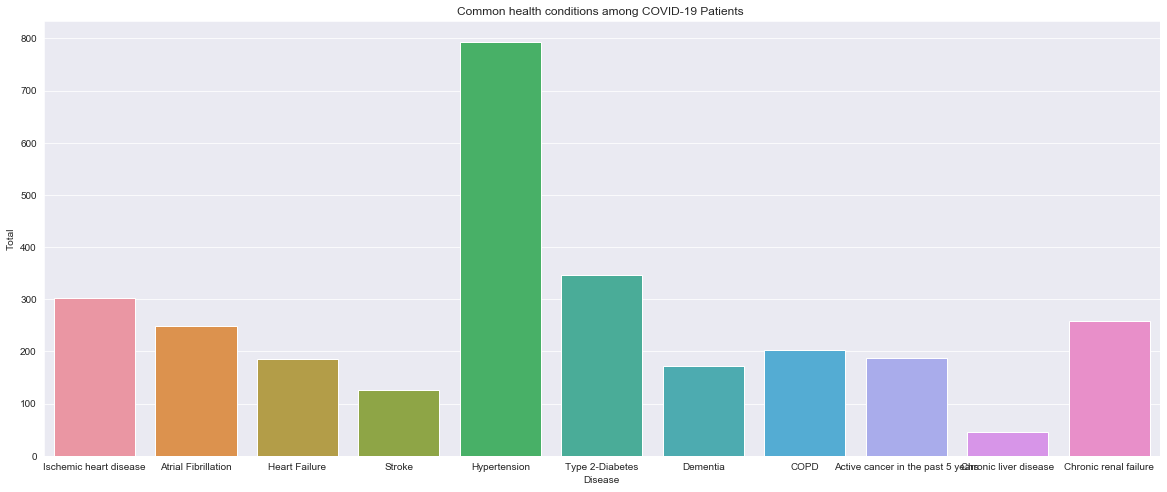

In [214]:
# Common underlying health condition amongst COVID-19 cases
fig, ax = plt.subplots(figsize=(20,8))
plt.title("Common health conditions among COVID-19 Patients ")
sns.barplot(ax = ax,
            data = covid_disease,
            x = 'Disease',
            y = 'Total')
plt.show()

Majority of those with the virus are patients with Hypertension

In [320]:
#Convert two columns of dataframe to dict
d_ = {Diseases: Frequency for Diseases, Frequency  in zip(covid_disease['Disease'].values, covid_disease['Total'].values)}

<Figure size 720x720 with 0 Axes>

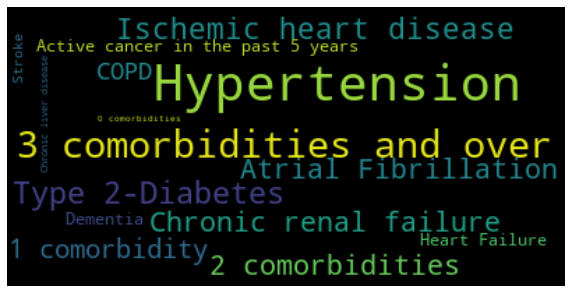

In [326]:
'''A word cloud of common underlying health conditions based on the frequencies of total column'''

#dataframe with disease and total column
word = covid_disease.drop(columns=['Men','Women','Unnamed: 0'],axis = 1)
for a, x in word.values:
    d[a] = x

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(10,10))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

**Third Dataset**

Dataset contains Nationality trend with all columns(hospitalized with symptoms, intensive care.. etc.)


In [329]:
#import csv
covid_nationality = pd.read_csv('Data/covid-nationality.csv')
covid_nationality

,Unnamed: 0,date,state,hospitalized_with_symptoms,intensive_care,total_hospitalized,home_quarantine,total_confirmed_cases,variation_total_confirmed,new_confirmed_cases,recovered,deaths,total_cases,swabs_made,casi_testati,note_it,note_en
0,0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN,NaN
1,1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN,NaN
2,2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN,NaN
3,3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN,NaN
4,4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,65,2020-04-29T17:00:00,ITA,19210,1795,21005,83652,104657,-548,2086,71252,27682,203591,1910761,1313460.0,NaN,NaN
66,66,2020-04-30T17:00:00,ITA,18149,1694,19843,81708,101551,-3106,1872,75945,27967,205463,1979217,1354901.0,NaN,NaN
67,67,2020-05-01T17:00:00,ITA,17569,1578,19147,81796,100943,-608,1965,78249,28236,207428,2053425,1398633.0,dc-IT-0015,dc-EN-0015
68,68,2020-05-02T17:00:00,ITA,17357,1539,18896,81808,100704,-239,1900,79914,28710,209328,2108837,1429864.0,dc-IT-0017,dc-EN-0017


In [2]:
#Get request
url = 'https://en.wikipedia.org/wiki/Provinces_of_Italy'

In [3]:
population = pd.read_html(url,header = 0)

In [4]:
#Population in provinces in italy 
province= population[2]
province.drop(['Type','Capital','Code','Region','Macroregion','Area(km²)','Density(p/km²)','Comuni','President'],inplace = True, axis = 1)

In [5]:
province

,Province,Population (2019)[3]
0,Agrigento,434870
1,Alessandria,421284
2,Ancona,471228
3,Aosta,125666
4,Arezzo,342654
...,...,...
103,Verona,926497
104,Vibo Valentia,160073
105,Vicenza,862418
106,Viterbo,317030


In [16]:
#Import Dataset
df = pd.read_csv('italy.csv',index_col = 'Date')
df.head()

,SNo,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
Date,,,,,,,,,,,,,,,,
2020-02-24T18:00:00,0,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
2020-02-24T18:00:00,1,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2020-02-24T18:00:00,2,ITA,21,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,NaN
2020-02-24T18:00:00,3,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
2020-02-24T18:00:00,4,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 17 columns):
SNo                          2499 non-null int64
Date                         2499 non-null object
Country                      2499 non-null object
RegionCode                   2499 non-null int64
RegionName                   2499 non-null object
Latitude                     2499 non-null float64
Longitude                    2499 non-null float64
HospitalizedPatients         2499 non-null int64
IntensiveCarePatients        2499 non-null int64
TotalHospitalizedPatients    2499 non-null int64
HomeConfinement              2499 non-null int64
CurrentPositiveCases         2499 non-null int64
NewPositiveCases             2499 non-null int64
Recovered                    2499 non-null int64
Deaths                       2499 non-null int64
TotalPositiveCases           2499 non-null int64
TestsPerformed               1344 non-null float64
dtypes: float64(3), int64(11), object(3)
memory usa

In [12]:
Obtain the number of (rows,columns)
df.shape

(2499, 17)

In [112]:
#Check for null values
df.isnull().sum()

Country                       0.0
RegionCode                    0.0
RegionName                    0.0
Latitude                      0.0
Longitude                     0.0
HospitalizedPatients          0.0
IntensiveCarePatients         0.0
TotalHospitalizedPatients     0.0
HomeConfinement               0.0
CurrentPositiveCases          0.0
NewPositiveCases              0.0
Recovered                     0.0
Deaths                        0.0
TotalPositiveCases            0.0
TestsPerformed               77.0
dtype: float64

In [113]:
#% of null values for each column
df.isnull().sum()/df.shape[1]

Country                       0.0
RegionCode                    0.0
RegionName                    0.0
Latitude                      0.0
Longitude                     0.0
HospitalizedPatients          0.0
IntensiveCarePatients         0.0
TotalHospitalizedPatients     0.0
HomeConfinement               0.0
CurrentPositiveCases          0.0
NewPositiveCases              0.0
Recovered                     0.0
Deaths                        0.0
TotalPositiveCases            0.0
TestsPerformed               77.0
dtype: float64

In [120]:
df.IntensiveCarePatients.value_counts()

Deaths                       1
Recovered                    1
NewPositiveCases             1
Longitude                    1
TotalHospitalizedPatients    1
HomeConfinement              1
Latitude                     1
RegionName                   1
HospitalizedPatients         1
Country                      1
IntensiveCarePatients        1
TestsPerformed               1
TotalPositiveCases           1
CurrentPositiveCases         1
RegionCode                   1
dtype: int64

In [136]:
df['RegionName'].unique()

array(['Abruzzo', 'Basilicata', 'P.A. Bolzano', 'Calabria', 'Campania',
       'Emilia-Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria',
       'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna',
       'Sicilia', 'Toscana', 'P.A. Trento', 'Umbria', "Valle d'Aosta",
       'Veneto'], dtype=object)

In [18]:
#change the Date column into datetime format
df.index = pd.to_datetime(df.index)

#Drop SNo column
df.drop(columns = ['SNo'],inplace  = True)

df.head(15)

,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
Date,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,ITA,21,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,NaN
2020-02-24 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,ITA,12,Lazio,41.892770,12.483667,1,1,2,0,2,2,1,0,3,NaN
2020-02-24 18:00:00,ITA,7,Liguria,44.411493,8.932699,0,0,0,0,0,0,0,0,0,NaN


### Exploratory Data Analysis :Gaining some insights on the data 

Answer the following questions 

* Timeframe between the first test case and the first death for each region

* Number of test, performed per region

* Number of deaths,per region

In [19]:
#Total number of confirmed cases and deaths recorded
df['Deaths'].sum()

2450932

In [34]:
#Region with the most deaths
deaths_per_region = pd.DataFrame(df.groupby(['RegionName'])['Deaths'].agg(sum))


In [21]:
#Group regions in terms of number of test performed
test_per_region = pd.DataFrame(df.groupby(['RegionName'])['TestsPerformed'].agg(sum))
test_per_region

,TestsPerformed
RegionName,
Abruzzo,2765229.0
Basilicata,1457007.0
Calabria,3546703.0
Campania,4936410.0
Emilia-Romagna,11120369.0
Friuli Venezia Giulia,4271966.0
Lazio,10659732.0
Liguria,3146183.0
Lombardia,23480900.0


In [97]:
#GSummary of covid related info from the dataset
df_covid = df.copy().drop(columns = ['Latitude','Longitude','Country','RegionCode'],axis = 1)
df_covid_summary=  pd.DataFrame(df_covid.groupby('RegionName').sum())
df_covid_summary

,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
RegionName,,,,,,,,,,
Abruzzo,21844,2660,24504,94995,119499,3286,99417,28549,247465,2765229.0
Basilicata,2868,570,3438,9217,12655,401,17324,1995,31974,1457007.0
Calabria,8131,677,8808,35022,43830,1174,43119,7172,94121,3546703.0
Campania,35416,4466,39882,127762,167644,4617,176010,30260,373914,4936410.0
Emilia-Romagna,189335,19365,208700,541517,750217,28221,1155832,308333,2214382,11120369.0
Friuli Venezia Giulia,11035,1757,12792,64245,77037,3305,159096,24325,260458,4271966.0
Lazio,96217,10441,106658,200819,307477,8016,223266,46121,576864,10659732.0
Liguria,56093,7296,63389,143035,206424,9927,391619,102018,700061,3146183.0
Lombardia,702408,67146,769554,1813408,2582962,92962,3107797,1226219,6916978,23480900.0


In [108]:
def Region_df(city):
    ''' Create dataframe for each region'''

    df_city = df_covid[df_covid['RegionName']== 'city']
    return df_city

In [77]:
df_RegionName = df_covid[df_covid['RegionName']== 'Puglia']
df_RegionName

,RegionName,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
Date,,,,,,,,,,,
2020-02-24 18:00:00,Puglia,0,0,0,0,0,0,0,0,0,NaN
2020-02-25 18:00:00,Puglia,0,0,0,0,0,0,0,0,0,NaN
2020-02-26 18:00:00,Puglia,0,0,0,0,0,0,0,0,0,NaN
2020-02-27 18:00:00,Puglia,1,0,1,0,1,1,0,0,1,NaN
2020-02-28 18:00:00,Puglia,1,0,1,2,3,2,0,0,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 17:00:00,Puglia,46,2,48,276,324,0,3656,536,4516,101350.0
2020-06-18 17:00:00,Puglia,34,1,35,271,306,3,3675,538,4519,103148.0
2020-06-19 17:00:00,Puglia,31,1,32,223,255,1,3727,538,4520,104225.0


In [107]:
Region_df('Puglia')

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [31]:

def make_plot(df,col_name):
    '''view plots based on column data'''
    if col_name in df.columns:
        fig = go.Figure([go.Scatter(x=df.index, y=df[col_name],mode='lines + markers',name= col_name)])
        fig.update_layout(showlegend = True)   
    return fig.show()

In [51]:
make_plot(df_Abruzzo,'CurrentPositiveCases')

In [35]:
make_plot(deaths_per_region,'deaths')
        


UnboundLocalError: local variable 'fig' referenced before assignment

In [115]:
df[df['Deaths'] != 0]
        

,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
Date,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,166,0,6,172,NaN
2020-02-24 18:00:00,ITA,5,Veneto,45.434905,12.338452,12,4,16,16,32,32,0,1,33,NaN
2020-02-25 18:00:00,ITA,3,Lombardia,45.466794,9.190347,79,25,104,127,231,68,0,9,240,NaN
2020-02-25 18:00:00,ITA,5,Veneto,45.434905,12.338452,12,7,19,23,42,10,0,1,43,NaN
2020-02-26 18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,20,3,23,23,46,21,0,1,47,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-21 17:00:00,ITA,9,Toscana,43.769231,11.255889,19,9,28,337,365,3,8750,1095,10210,217330.0
2020-06-21 17:00:00,ITA,22,P.A. Trento,46.068935,11.121231,0,0,0,53,53,5,3944,466,4463,58345.0
2020-06-21 17:00:00,ITA,10,Umbria,43.106758,12.388247,4,1,5,10,15,0,1345,78,1438,61227.0


In [125]:
range(len(df['df.index'])

SyntaxError: unexpected EOF while parsing (<ipython-input-125-13fa760644e3>, line 1)